# Case Study: dbGAP

The NCBI's Database of Genotypes and Phenotypes (dbGaP) is one of the data systems currently working to export research phenotypic data using the FHIR specification. The dbGAP data included in the demonstration comes from phs002409, “Test Study ALPHA” a synthetic data set. This study was created to simulate an actual study for the FHIR API testing project. A single study with 813 patients and 466 observations is included. In this implementation, ResearchStudy.extensions defines dbGap variables aggregate study variables such as NumPhenotypeDatasets, NumVariables, and NumSubjects are contained in ResearchStudy.extension.

In [1]:
import logging
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')
logging.basicConfig(level=logging.ERROR)

In [2]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data


> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide

> There is a missing item, Observation.status, so we load with `validation` disabled

In [4]:
graph = load_graph('dbgap', manifests.dbgap_file_paths(), expected_resource_count=2000, strict=False, check_edges=True)
# """2022-06-21 21:09:52,591 fhirabstractbase.py WARNING  'Non-optional property "status" on <fhirclient.models.observation.Observation object at 0x7f83cbe49d10> is missing"""


### Draw a summary graph

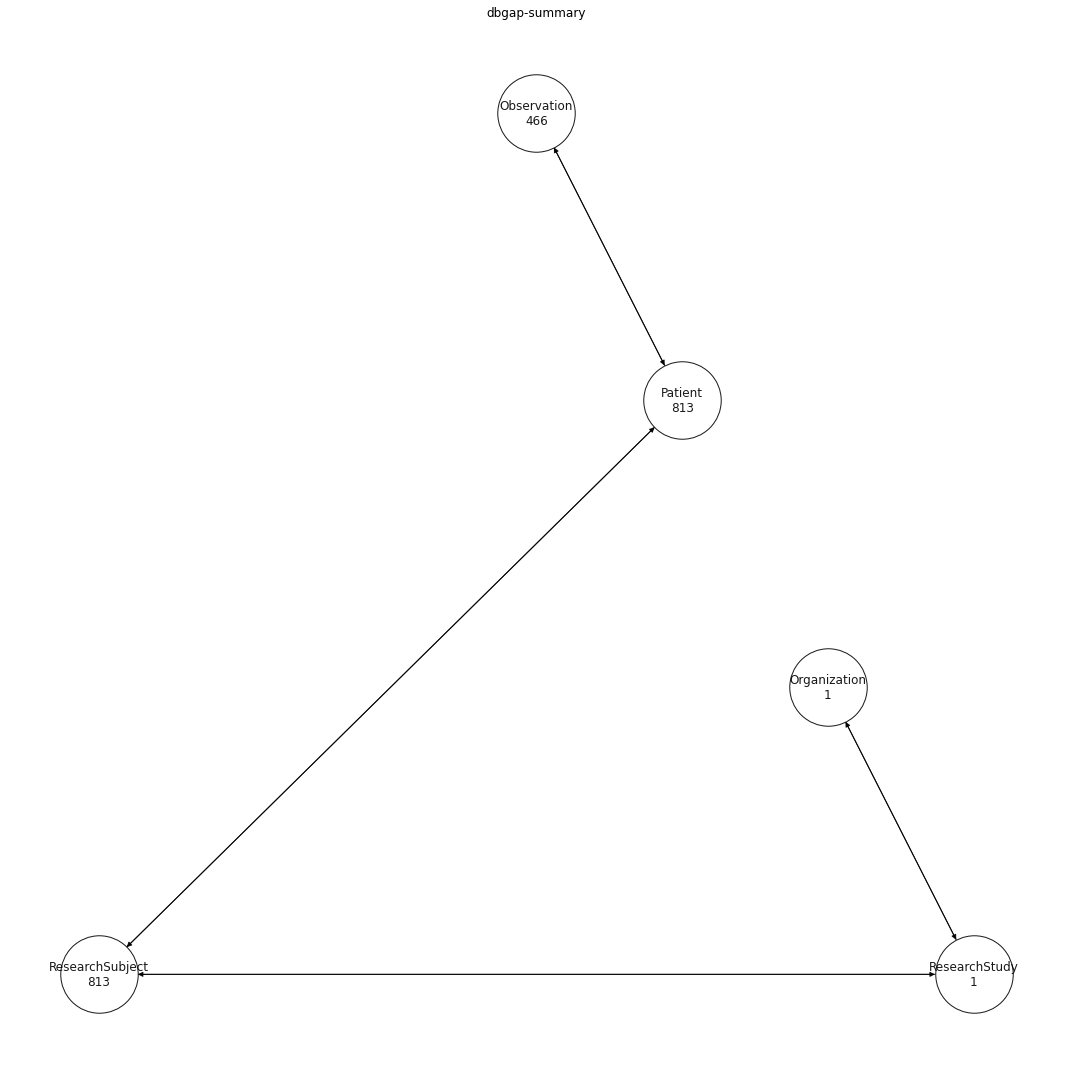

In [5]:
summary_graph = summarize_graph(graph)
path = os.path.join('/tmp/', 'dbgap-summary.png')
draw_graph(summary_graph, path=path)

### Retrieve all Patients

In [6]:
# "retrieve" the patients
patients = find_by_resource_type(graph, 'Patient')
# count the tuples that returned
assert len(patients) == 813, "should have 813 patients"
# get the FHIR resource
patients = [dict_['resource'] for id_, dict_ in patients]


### Show details

In [7]:
pd.DataFrame([flatten(patient.as_json()) for patient in patients] )

,id,meta_versionId,meta_lastUpdated,meta_source,text_status,text_div,identifier_0_id,identifier_0_system,gender,resourceType
0,3635187,1,2022-05-10T12:37:53.494-04:00,#ErFMuLwGRXdlJhFt,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",3635187,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Cod...,unknown,Patient
1,3635253,1,2022-05-10T12:38:26.889-04:00,#THwQfl499ABEFSgo,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",3635253,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Cod...,unknown,Patient
2,3635192,1,2022-05-10T12:38:04.222-04:00,#R02F58BYBnDFw4Ns,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",3635192,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Cod...,unknown,Patient
3,3635197,1,2022-05-10T12:37:58.748-04:00,#icdAgIPn6V8KjhSr,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",3635197,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Cod...,unknown,Patient
4,3635255,1,2022-05-10T12:38:25.148-04:00,#SkpfZN8z6pUmXK4U,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",3635255,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Cod...,unknown,Patient
...,...,...,...,...,...,...,...,...,...,...
808,3635989,1,2022-05-10T12:44:05.580-04:00,#L0i9w4JKBIYkQkEI,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",3635989,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Cod...,unknown,Patient
809,3635993,1,2022-05-10T12:44:08.532-04:00,#PvYthllkUFr9jdcz,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",3635993,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Cod...,unknown,Patient
810,3635969,1,2022-05-10T12:44:11.383-04:00,#hMhWcvCP3Oy19pF0,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",3635969,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Cod...,unknown,Patient
811,3635982,1,2022-05-10T12:44:12.378-04:00,#RqWzaWlP1jK1hDmL,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",3635982,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Cod...,unknown,Patient


### Show simplified details

> 1/3 the number of columns

In [8]:
pd.DataFrame([flatten(patient.as_simplified_json()[0]) for patient in patients] )

,id,meta_versionId,meta_lastUpdated,meta_source,text_status,text_div,gender
0,3635187,1,2022-05-10T12:37:53.494000-04:00,#ErFMuLwGRXdlJhFt,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",unknown
1,3635253,1,2022-05-10T12:38:26.889000-04:00,#THwQfl499ABEFSgo,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",unknown
2,3635192,1,2022-05-10T12:38:04.222000-04:00,#R02F58BYBnDFw4Ns,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",unknown
3,3635197,1,2022-05-10T12:37:58.748000-04:00,#icdAgIPn6V8KjhSr,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",unknown
4,3635255,1,2022-05-10T12:38:25.148000-04:00,#SkpfZN8z6pUmXK4U,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",unknown
...,...,...,...,...,...,...,...
808,3635989,1,2022-05-10T12:44:05.580000-04:00,#L0i9w4JKBIYkQkEI,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",unknown
809,3635993,1,2022-05-10T12:44:08.532000-04:00,#PvYthllkUFr9jdcz,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",unknown
810,3635969,1,2022-05-10T12:44:11.383000-04:00,#hMhWcvCP3Oy19pF0,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",unknown
811,3635982,1,2022-05-10T12:44:12.378000-04:00,#RqWzaWlP1jK1hDmL,generated,"<div xmlns=""http://www.w3.org/1999/xhtml""><tab...",unknown


## Navigate using FHIR references

In [9]:
# "retrieve" the study
research_study = find_by_resource_type(graph, 'ResearchStudy')[0][1]['resource']
(research_study, research_study.id)

(<fhirclient.models.researchstudy.ResearchStudy at 0x7fc051ef5ad0>,
 'phs002409')

In [10]:
f"The id of the sponsor is {research_study.sponsor.resolved().id}"

'The id of the sponsor is NLM'

In [11]:
research_subjects = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'ResearchSubject')]
patients = [research_subject.individual for research_subject in research_subjects]
f"research_subjects: {len(research_subjects)} patients: {len(patients)}"

'research_subjects: 813 patients: 813'

In [12]:
tasks = [dict_['resource'] for id_, dict_ in  find_by_resource_type(graph, 'Task')]
f"tasks: {len(tasks)}"

'tasks: 0'

In [13]:
observations = [dict_['resource'] for id_, dict_ in  find_by_resource_type(graph, 'Observation')]
f"observations: {len(observations)}"

'observations: 466'

In [15]:
pd.DataFrame([flatten(observation.as_simplified_json()[0]) for observation in observations]).sort_values(['valueCodeableConcept_coding_DbGaP-Phenotype-Variable-phv00492039']).fillna('')

,id,meta_versionId,meta_lastUpdated,meta_source,meta_security_DbGaPConcept-SecurityStudyConsent,extension_workflow-instantiatesUri,code_coding_DbGaPConcept-VariableAccession,subject_reference,valueQuantity_value,valueQuantity_unit,...,code_coding_19_code,code_coding_19_display,valueCodeableConcept_coding_DbGaP-Phenotype-Variable-phv00492033,valueCodeableConcept_coding_DbGaP-Phenotype-Variable-phv00492036,valueCodeableConcept_coding_DbGaP-Phenotype-Variable-phv00492037,valueCodeableConcept_coding_DbGaP-Phenotype-Variable-phv00492038,valueCodeableConcept_coding_DbGaP-Phenotype-Variable-phv00492039,valueCodeableConcept_coding_DbGaP-Phenotype-Variable-phv00492040,valueCodeableConcept_coding_DbGaP-Phenotype-Variable-phv00492062,valueCodeableConcept_coding_DbGaP-Phenotype-Variable-phv00492070
187,492039-3635443-0,1,2022-05-10T12:49:03.900000-04:00,#7K9AVxjAvKJJzqZv,phs002409-1,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Evi...,phv00492039.v1.p1,Patient/3635443,,,...,,,,,,,0,,,
188,492039-3635565-0,1,2022-05-10T12:49:04.180000-04:00,#HhVb2py0HHlVxtLD,phs002409-1,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Evi...,phv00492039.v1.p1,Patient/3635565,,,...,,,,,,,0,,,
189,492039-3635671-0,1,2022-05-10T12:49:04.233000-04:00,#pGdRtVWZjutVqlRN,phs002409-1,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Evi...,phv00492039.v1.p1,Patient/3635671,,,...,,,,,,,0,,,
190,492039-3635749-0,1,2022-05-10T12:49:04.283000-04:00,#D1AiirM2Pqecs2VT,phs002409-1,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Evi...,phv00492039.v1.p1,Patient/3635749,,,...,,,,,,,0,,,
191,492039-3635266-0,1,2022-05-10T12:49:04.328000-04:00,#PbmHxbVslyIw0JNv,phs002409-1,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Evi...,phv00492039.v1.p1,Patient/3635266,,,...,,,,,,,1,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,492066-3635705-0,1,2022-05-10T12:49:40.471000-04:00,#aJ2cwhnnq8LT1DLw,phs002409-1,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Evi...,,Patient/3635705,3.0,Units were not extracted correctly in this rel...,...,,,,,,,,,,
462,492069-3635301-0,1,2022-05-10T12:49:41.685000-04:00,#Nuh2vpa22Ryt5Qnt,phs002409-1,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Evi...,phv00492069.v1.p1,Patient/3635301,0.214286,Units were not extracted correctly in this rel...,...,,,,,,,,,,
463,492071-3635364-0,1,2022-05-10T12:49:43.771000-04:00,#YfTxzPmYYQK1CzPQ,phs002409-1,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Evi...,phv00492071.v1.p1,Patient/3635364,14.0,Units were not extracted correctly in this rel...,...,,,,,,,,,,
464,492072-3635356-0,1,2022-05-10T12:49:45.070000-04:00,#Urzac9Pqhdnfq9OT,phs002409-1,https://dbgap-api.ncbi.nlm.nih.gov/fhir/x1/Evi...,phv00492072.v1.p1,Patient/3635356,1.0,Units were not extracted correctly in this rel...,...,,,,,,,,,,
